# Feature detection and corners

(427, 640, 3)


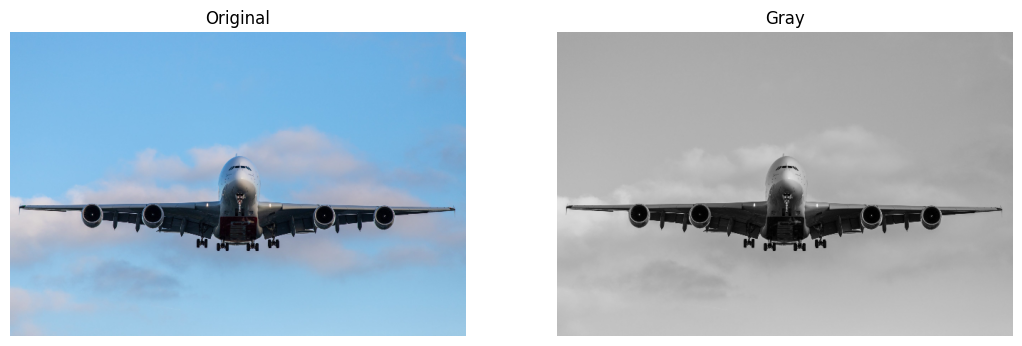

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

# read airplane photo
img = cv2.imread("aircraft.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, None, fx = 0.25, fy = 0.25)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(img.shape)

# display image
fig = plt.figure(figsize = (20, 10))

plt.subplot(131); plt.imshow(img[:, :, ::-1]); plt.title("Original"); plt.axis('off')
plt.subplot(132); plt.imshow(img_gray, cmap = 'gray'); plt.title("Gray"); plt.axis('off')

plt.show()

[[ 0.  0.  0. ... -0.  0.  0.]
 [ 0.  0.  0. ... -0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0. -0. ...  0. -0. -0.]
 [ 0.  0.  0. ... -0. -0.  0.]
 [-0. -0.  0. ... -0.  0.  0.]]


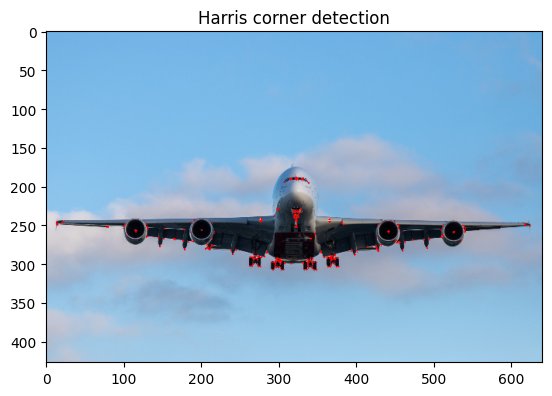

In [21]:
# Harris corner detection
gray = np.float32(img_gray)
harr: cv2.typing.MatLike = cv2.cornerHarris(gray, blockSize = 2, ksize = 3, k = 0.04)

harr_img = img.copy()
harr_img[harr > 0.01 * harr.max()] = [0, 0, 255]

print(np.round(harr))

plt.imshow(harr_img[:, :, ::-1]); plt.title("Harris corner detection"); plt.show()

[[[276 245]]

 [[144 266]]

 [[323 189]]

 [[320 232]]

 [[178 281]]

 [[272 293]]

 [[ 13 247]]

 [[459 282]]

 [[354 284]]

 [[494 268]]

 [[146 276]]

 [[344 297]]

 [[372 293]]

 [[131 263]]

 [[115 256]]

 [[213 276]]

 [[397 287]]

 [[428 282]]

 [[330 300]]

 [[244 282]]

 [[183 271]]

 [[165 267]]

 [[491 278]]

 [[308 300]]

 [[295 297]]]


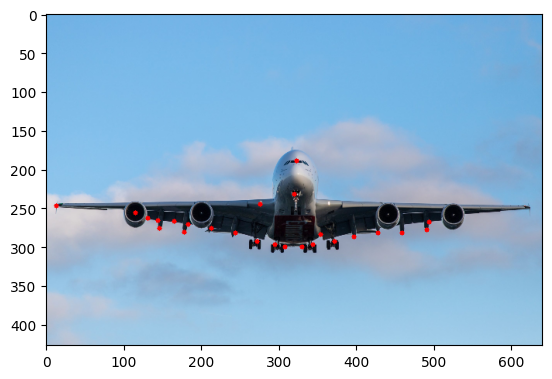

In [27]:
# Shi-Tomasi corner detector
corners: cv2.typing.MatLike = cv2.goodFeaturesToTrack(img_gray, 25, 0.01, 10)
corners = np.int16(corners)
print(corners)

good_features = img.copy()

for i in corners:
    x,y = i.ravel()
    cv2.circle(good_features, (x,y), 3, (0, 0, 255), -1)

plt.imshow(good_features[:, :, ::-1]); plt.show()


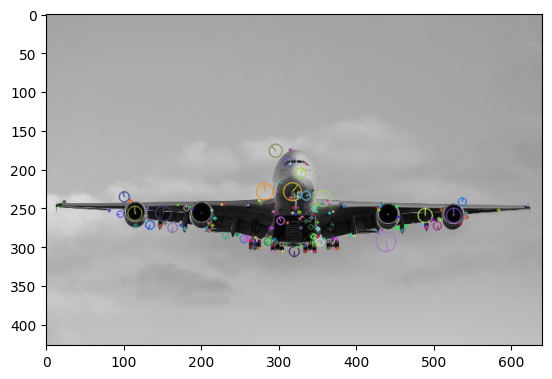

In [36]:
# SIFT
sift = cv2.SIFT.create()

key_points = sift.detect(img_gray, None)

img_sift = img.copy()
img_sift = cv2.drawKeypoints(img_gray, key_points, img_sift, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_sift[:, :, ::-1])

Threshold: 10
NonMaxSuppression: True
neighborhood: 2
Total Keypoints with nonMaxSuppression: 721


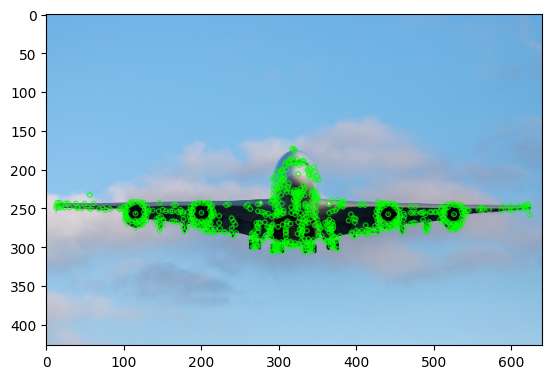

Total Keypoints without nonmaxSuppression: 2745


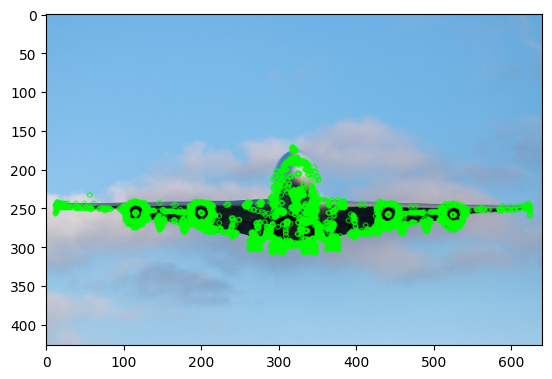

In [43]:
# FAST feature detector algorithm
fast = cv2.FastFeatureDetector.create(threshold = 10)

key_points = fast.detect(img_gray, None)
img_fast = cv2.drawKeypoints(img, key_points, None, color = (0, 255, 0))

print("Threshold: {}".format(fast.getThreshold()))
print("NonMaxSuppression: {}".format(fast.getNonmaxSuppression()))
print("neighborhood: {}".format(fast.getType()))
print("Total Keypoints with nonMaxSuppression: {}".format(len(key_points)))

plt.imshow(img_fast[:, :, ::-1])
plt.show()

fast.setNonmaxSuppression(False)
key_points = fast.detect(img_gray, None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(key_points)) )

img_fast = cv2.drawKeypoints(img, key_points, None, color = (0, 255, 0))

plt.imshow(img_fast[:, :, ::-1])
plt.show()

Number of key points: 500


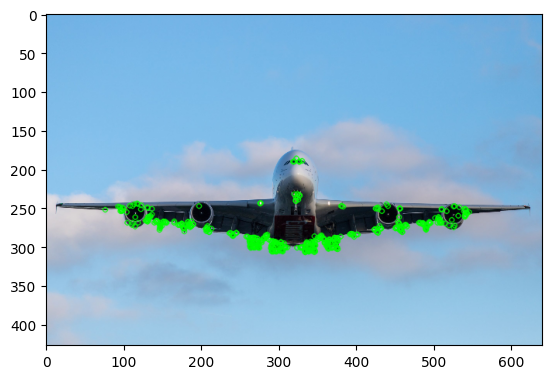

In [45]:
# ORB feature detector
orb = cv2.ORB.create()

key_points = orb.detect(img_gray, None)
# compute orb descriptors
key_points, descriptors = orb.compute(img, key_points)
print("Number of key points:", len(key_points))

img_orb = cv2.drawKeypoints(img, key_points, None, color = (0, 255, 0), flags = 0)
plt.imshow(img_orb[:, :, ::-1]); plt.show()